In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [31]:
main_df = pd.read_csv("../Dataset/train_radiomics_occipital_CONTROL.csv")

In [32]:
def show_histogram(title="histogram",df=main_df):
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.17)
    plt.title(title)
    sns.histplot(df)
    plt.show()

In [33]:
def show_heatmap(title="correlation heatmap",df=main_df):
    df = df.select_dtypes(include="number")
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.25,left=0.22,right=0.95)
    plt.xticks(rotation=15)
    plt.title(title)
    sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
    plt.show()

In [34]:
def show_boxplot(title="boxplot",columns=main_df.columns,df=main_df):
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.17)
    df[columns].boxplot()
    plt.xticks(rotation=15)
    plt.title(title)
    plt.show()

In [35]:
def detect_outliers(column, df=main_df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar os outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    show_boxplot(title=f"{column} boxplot",df=df,columns=[column])

    return outliers[column]

# IQR method 
## considera como outliers os dados que estao 1.5*IQR acima e abaixo do primeiro e terceiro quartil, respetivamente. IQR = Q3 - Q1

In [36]:
def explore_outliers(df=main_df,columns=main_df.columns):
    number_df = df[columns].select_dtypes(include="number")
    n_columns = number_df.columns
    # normalização para ser visualmente perceptivel nos plots
    scaler = MinMaxScaler()
    number_df_scaled = pd.DataFrame(scaler.fit_transform(number_df),columns=n_columns)

    for i in range(0, len(n_columns),7):
        show_boxplot(df=number_df_scaled,columns=n_columns[i:i+7])
        
# esta função faz um loop de 7 em 7 colunas por todas as colunas do dataset para uma analise geral dos outliers.
# esta operacao é demorada e nao muito boa porque 2181 / 7 = 300 vezes

In [37]:
def main_exploration(df=main_df):
    print(df.shape) 
main_exploration()

(305, 2181)


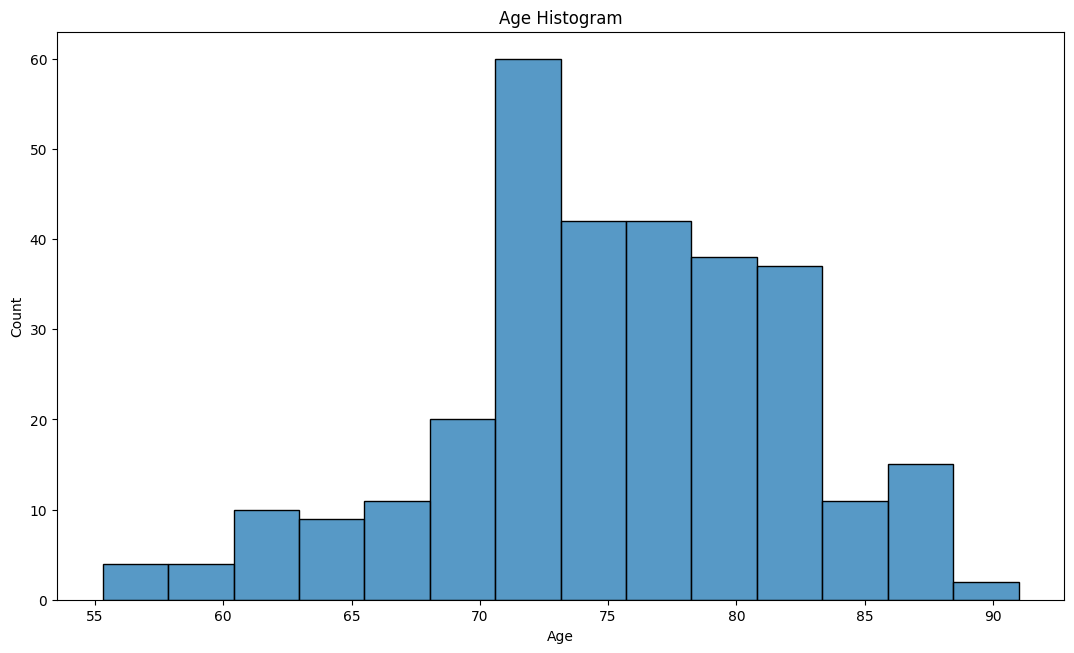

count    305.000000
mean      75.171148
std        6.675866
min       55.300000
25%       71.300000
50%       75.000000
75%       79.900000
max       91.000000
Name: Age, dtype: float64


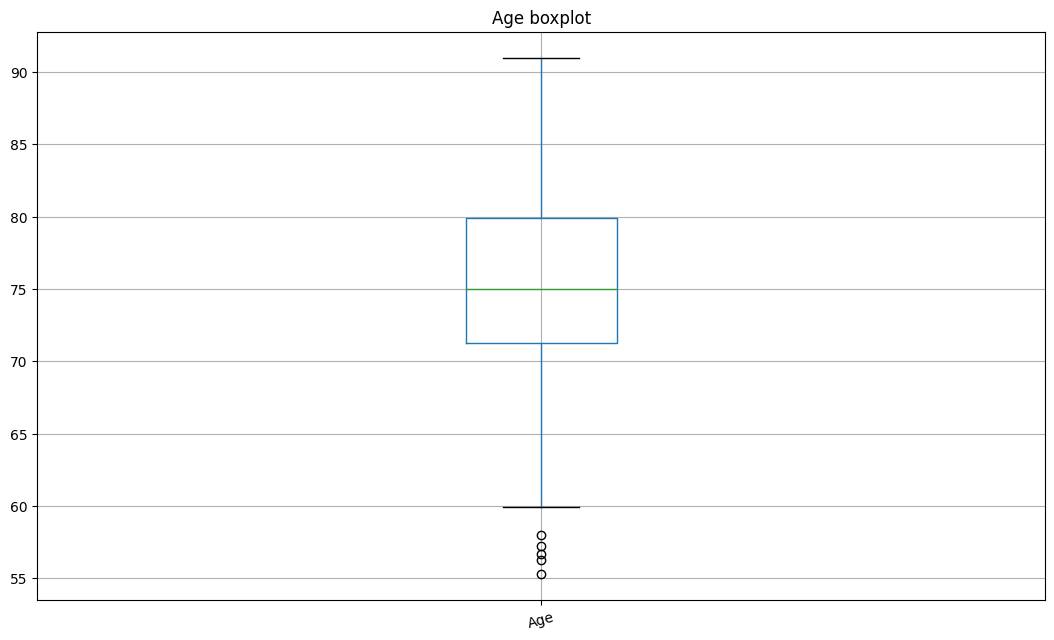

41     55.3
106    57.2
147    56.3
248    58.0
292    56.7
Name: Age, dtype: float64


In [48]:
def numerical_exploration(df=main_df):
    # age exploration
    age_exploration = df["Age"].describe()
    show_histogram("Age Histogram",df["Age"])
    print(age_exploration)
    print(detect_outliers("Age"))
numerical_exploration()

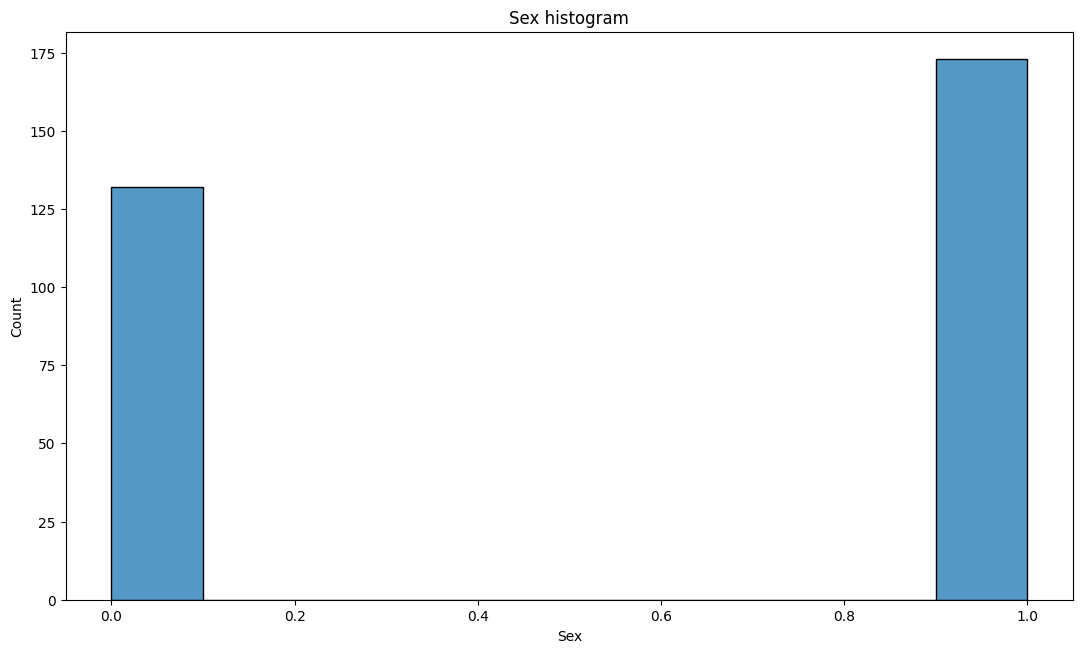

Sex
1    173
0    132
Name: count, dtype: int64


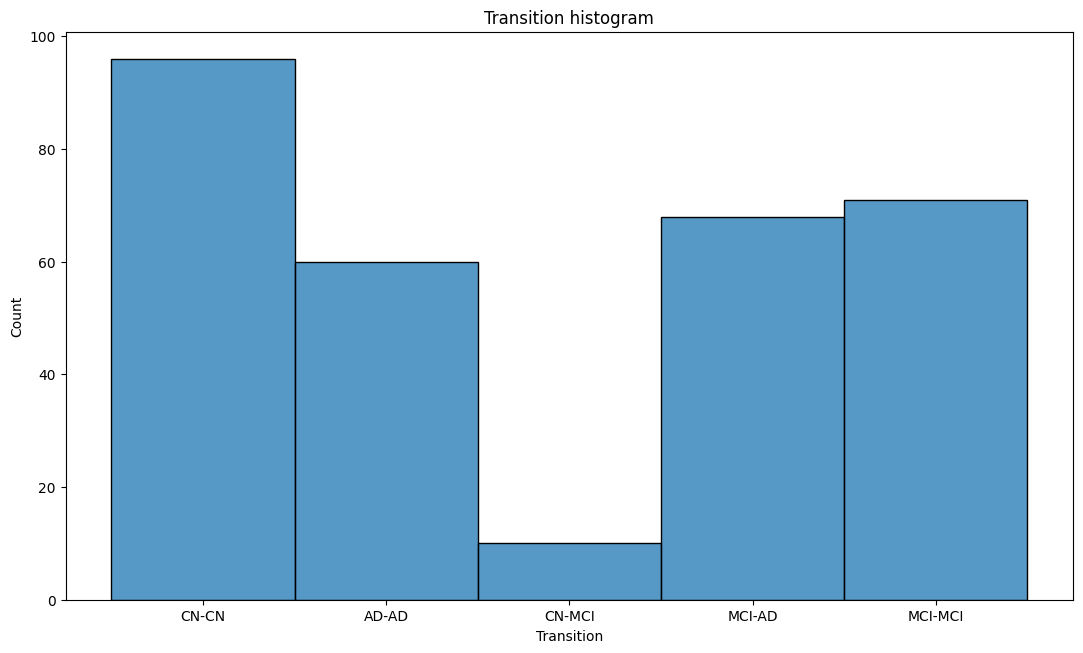

Transition
CN-CN      96
MCI-MCI    71
MCI-AD     68
AD-AD      60
CN-MCI     10
Name: count, dtype: int64


In [39]:
def categorical_exploration(df=main_df):
    """
    Transition description:
    CN - Cognitive Normal, estado normal
    MCI - Mild Cognitive Impairment, estado entre o avanço normal da perda de memoria com a idade e um certo declinio serio de demencia
    AD - Azlheimer Disease, forma mais comum de demencia nas pessoas mais velhas
    """
    categorical_df = df[["Sex","Transition"]]

    for column in categorical_df.columns:
        show_histogram(f"{column} histogram",categorical_df[column])
        print(df[column].value_counts())

categorical_exploration()

In [44]:
def diagnostics_versions_explorer(df=main_df):
    diagnostics_versions_columns = ["diagnostics_Versions_PyRadiomics","diagnostics_Versions_Numpy","diagnostics_Versions_SimpleITK","diagnostics_Versions_PyWavelet","diagnostics_Versions_Python"] 

    for column in diagnostics_versions_columns:
        print(column,": ")
        values = df[column].unique()
        print(values)


In [45]:
def diagnostics_image_explorer(df=main_df):
    diagnostics_image_columns = ["diagnostics_Image-original_Dimensionality","diagnostics_Image-original_Spacing","diagnostics_Image-original_Size","diagnostics_Image-original_Mean","diagnostics_Image-original_Minimum","diagnostics_Image-original_Maximum"]

    for column in diagnostics_image_columns:
        print(column,": ")
        values = df[column].unique()
        print(values)
        show_histogram(title=column,df=df[column])

    explore_outliers(columns=diagnostics_image_columns)

    print(df[diagnostics_image_columns].describe())
    print(df[diagnostics_image_columns].info())
    
# é necessário explorar melhor

In [46]:
def diagnostics_mask_explorer(df=main_df):
    diagnostics_mask_columns = ["diagnostics_Mask-original_Spacing","diagnostics_Mask-original_Size","diagnostics_Mask-original_BoundingBox","diagnostics_Mask-original_VoxelNum","diagnostics_Mask-original_VolumeNum","diagnostics_Mask-original_CenterOfMassIndex","diagnostics_Mask-original_CenterOfMass"]

    
    for column in diagnostics_mask_columns:
        print(column,": ")
        values = df[column].unique()
        print(values)
        show_histogram(title=column,df=df[column])
    

    print(detect_outliers("diagnostics_Mask-original_VoxelNum"))
    print(detect_outliers("diagnostics_Mask-original_VolumeNum"))
    explore_outliers(columns=diagnostics_mask_columns)
    
    print(df[diagnostics_mask_columns].describe(),"\n")
    print(df[diagnostics_mask_columns].info())
    
# é preciso explorar muito melhor

In [47]:
def masks_images_correlation(df=main_df):
    diagnostics = ["diagnostics_Mask-original_Spacing","diagnostics_Mask-original_Size","diagnostics_Mask-original_BoundingBox","diagnostics_Mask-original_VoxelNum","diagnostics_Mask-original_VolumeNum","diagnostics_Mask-original_CenterOfMassIndex","diagnostics_Mask-original_CenterOfMass","diagnostics_Image-original_Spacing","diagnostics_Image-original_Size","diagnostics_Image-original_Mean","diagnostics_Image-original_Maximum"]

    show_heatmap(df=df[diagnostics])
    
# ainda nao consigo tirar conclusões ao certo